In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/commodities_12_22.csv')
df.head()

,Date,Crude Oil,Brent Oil,Natural Gas,Gold,Silver,Copper
0,2022-06-15,119.11,121.35,7.296,1814.8,21.090,4.1777
1,2022-06-14,118.93,121.17,7.189,1813.5,20.954,4.1565
2,2022-06-13,120.93,122.27,8.609,1831.8,21.255,4.2115
3,2022-06-10,120.67,122.01,8.850,1875.5,21.931,4.2945
4,2022-06-09,121.51,123.07,8.963,1852.8,21.817,4.3810


In [3]:
df.describe()

,Crude Oil,Brent Oil,Natural Gas,Gold,Silver,Copper
count,2734.000000,2701.000000,2733.000000,2742.000000,3256.000000,2686.000000
mean,65.696774,73.710655,3.174109,1452.908888,20.324379,3.126402
std,22.436471,26.026078,1.058706,252.226159,5.321043,0.639881
min,26.210000,19.330000,1.482000,1049.700000,11.772000,1.994000
25%,50.100000,52.370000,2.582000,1256.150000,16.319750,2.688000
50%,55.280000,66.550000,2.912000,1337.250000,18.071000,3.050000
75%,90.032500,103.460000,3.649000,1684.750000,23.897000,3.435000
max,122.110000,127.980000,9.322000,2054.600000,37.140000,4.912500


In [4]:
df.dtypes

Date            object
Crude Oil      float64
Brent Oil      float64
Natural Gas    float64
Gold           float64
Silver         float64
Copper         float64
dtype: object

In [5]:
df=df.iloc[::-1]

df.head()

,Date,Crude Oil,Brent Oil,Natural Gas,Gold,Silver,Copper
3258,2012-01-02,NaN,NaN,NaN,NaN,28.160,NaN
3257,2012-01-08,NaN,NaN,NaN,NaN,28.848,NaN
3256,2012-01-15,NaN,NaN,NaN,NaN,29.785,NaN
3255,2012-01-22,NaN,NaN,NaN,NaN,31.793,NaN
3254,2012-01-29,NaN,NaN,NaN,NaN,33.908,NaN


In [6]:
df[["Year", "Month", "Day"]] = df["Date"].str.split("-", expand = True)
df.head()

,Date,Crude Oil,Brent Oil,Natural Gas,Gold,Silver,Copper,Year,Month,Day
3258,2012-01-02,NaN,NaN,NaN,NaN,28.160,NaN,2012,01,02
3257,2012-01-08,NaN,NaN,NaN,NaN,28.848,NaN,2012,01,08
3256,2012-01-15,NaN,NaN,NaN,NaN,29.785,NaN,2012,01,15
3255,2012-01-22,NaN,NaN,NaN,NaN,31.793,NaN,2012,01,22
3254,2012-01-29,NaN,NaN,NaN,NaN,33.908,NaN,2012,01,29


In [7]:
df_copy=df.copy()

In [8]:
da=["Month", "Day"]
for j,i in enumerate(da):
    col_date=df.pop(i)
    df.insert(j+2,i,col_date)
df.head()

,Date,Crude Oil,Month,Day,Brent Oil,Natural Gas,Gold,Silver,Copper,Year
3258,2012-01-02,NaN,01,02,NaN,NaN,NaN,28.160,NaN,2012
3257,2012-01-08,NaN,01,08,NaN,NaN,NaN,28.848,NaN,2012
3256,2012-01-15,NaN,01,15,NaN,NaN,NaN,29.785,NaN,2012
3255,2012-01-22,NaN,01,22,NaN,NaN,NaN,31.793,NaN,2012
3254,2012-01-29,NaN,01,29,NaN,NaN,NaN,33.908,NaN,2012


In [9]:
for i in df:
    if i!="Date":
        df[i]=df[i].astype('float64')
        print(df[i])
    else:
        pass

3258       NaN
3257       NaN
3256       NaN
3255       NaN
3254       NaN
         ...  
4       121.51
3       120.67
2       120.93
1       118.93
0       119.11
Name: Crude Oil, Length: 3259, dtype: float64
3258    1.0
3257    1.0
3256    1.0
3255    1.0
3254    1.0
       ... 
4       6.0
3       6.0
2       6.0
1       6.0
0       6.0
Name: Month, Length: 3259, dtype: float64
3258     2.0
3257     8.0
3256    15.0
3255    22.0
3254    29.0
        ... 
4        9.0
3       10.0
2       13.0
1       14.0
0       15.0
Name: Day, Length: 3259, dtype: float64
3258       NaN
3257       NaN
3256       NaN
3255       NaN
3254       NaN
         ...  
4       123.07
3       122.01
2       122.27
1       121.17
0       121.35
Name: Brent Oil, Length: 3259, dtype: float64
3258      NaN
3257      NaN
3256      NaN
3255      NaN
3254      NaN
        ...  
4       8.963
3       8.850
2       8.609
1       7.189
0       7.296
Name: Natural Gas, Length: 3259, dtype: float64
3258       NaN
3257

In [10]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df

,Date,Crude Oil,Month,Day,Brent Oil,Natural Gas,Gold,Silver,Copper,Year
3258,2012-01-02,NaN,1.0,2.0,NaN,NaN,NaN,28.160,NaN,2012.0
3257,2012-01-08,NaN,1.0,8.0,NaN,NaN,NaN,28.848,NaN,2012.0
3256,2012-01-15,NaN,1.0,15.0,NaN,NaN,NaN,29.785,NaN,2012.0
3255,2012-01-22,NaN,1.0,22.0,NaN,NaN,NaN,31.793,NaN,2012.0
3254,2012-01-29,NaN,1.0,29.0,NaN,NaN,NaN,33.908,NaN,2012.0
...,...,...,...,...,...,...,...,...,...,...
4,2022-06-09,121.51,6.0,9.0,123.07,8.963,1852.8,21.817,4.3810,2022.0
3,2022-06-10,120.67,6.0,10.0,122.01,8.850,1875.5,21.931,4.2945,2022.0
2,2022-06-13,120.93,6.0,13.0,122.27,8.609,1831.8,21.255,4.2115,2022.0
1,2022-06-14,118.93,6.0,14.0,121.17,7.189,1813.5,20.954,4.1565,2022.0


In [11]:
df.dtypes

Date           datetime64[ns]
Crude Oil             float64
Month                 float64
Day                   float64
Brent Oil             float64
Natural Gas           float64
Gold                  float64
Silver                float64
Copper                float64
Year                  float64
dtype: object

# **Exploratory Data Analysis**

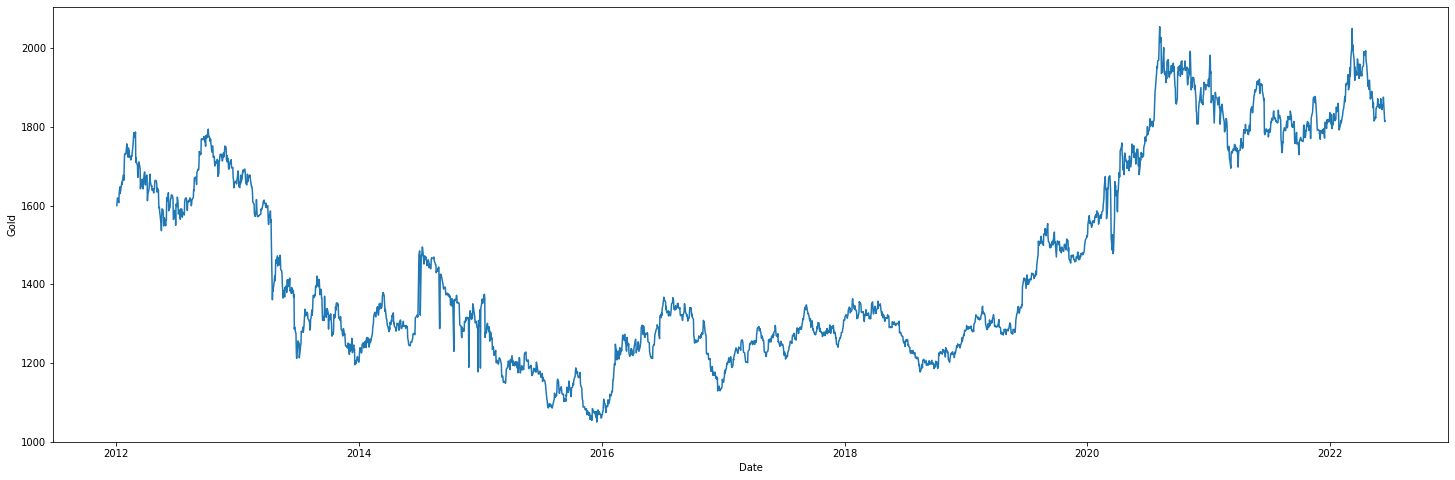

In [12]:
plt.rcParams["figure.figsize"] = (25,8)
sns.lineplot(data=df, x="Date", y="Gold")

plt.show()

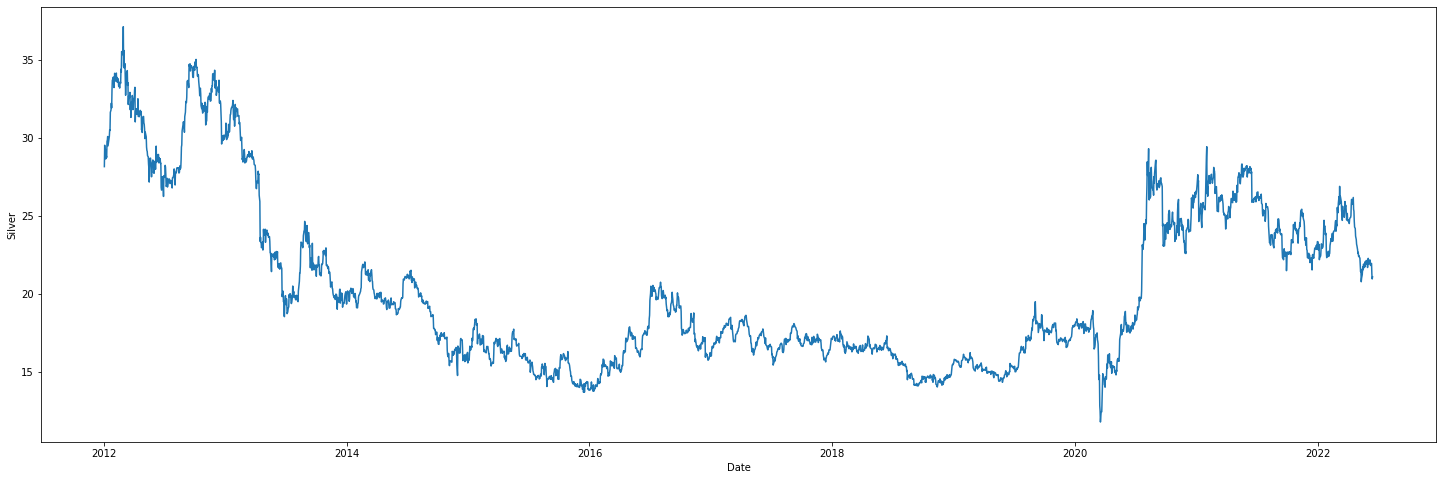

In [13]:
plt.rcParams["figure.figsize"] = (25,8)
sns.lineplot(data=df, x="Date", y="Silver")
plt.show()

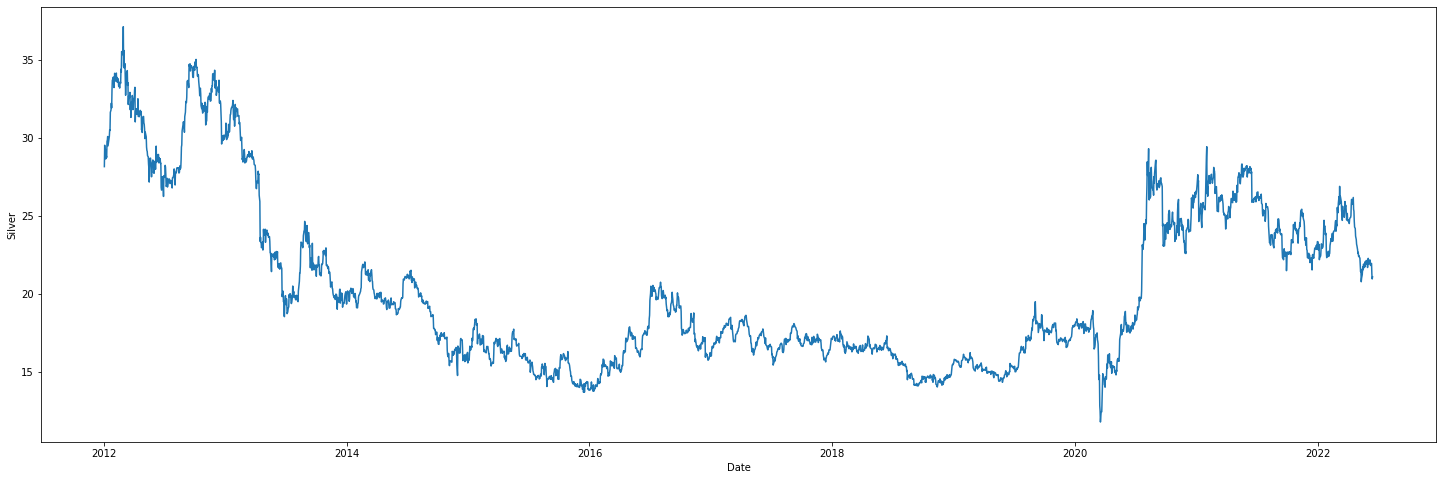

In [14]:
plt.rcParams["figure.figsize"] = (25,8)
sns.lineplot(data=df, x="Date", y="Silver")

plt.show()

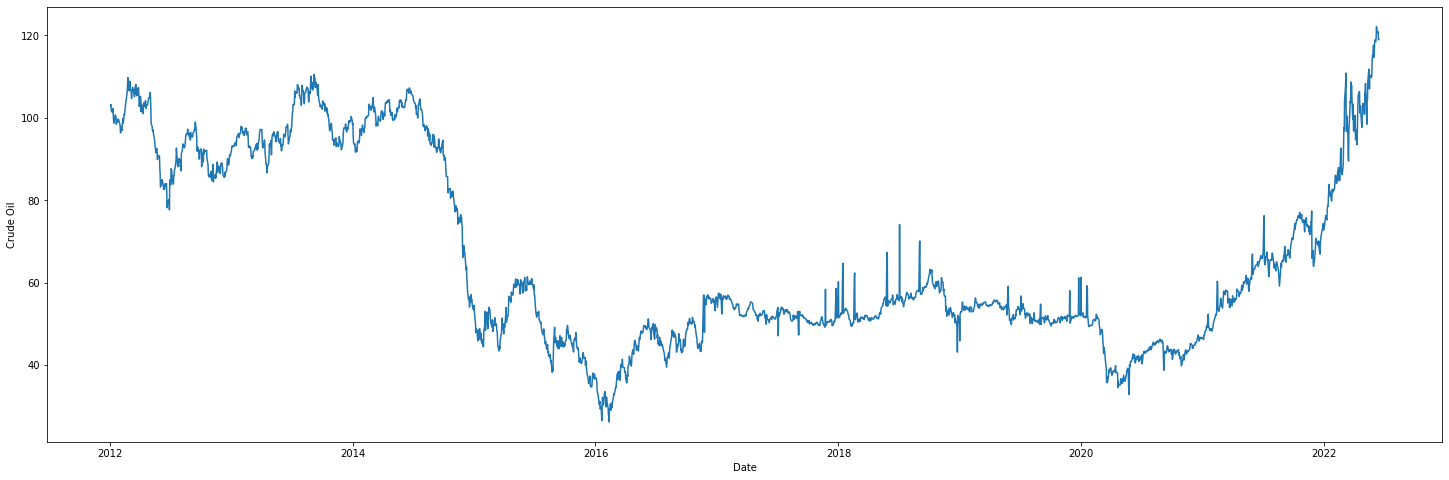

In [15]:
plt.rcParams["figure.figsize"] = (25,8)
sns.lineplot(data=df, x="Date", y="Crude Oil")

plt.show()

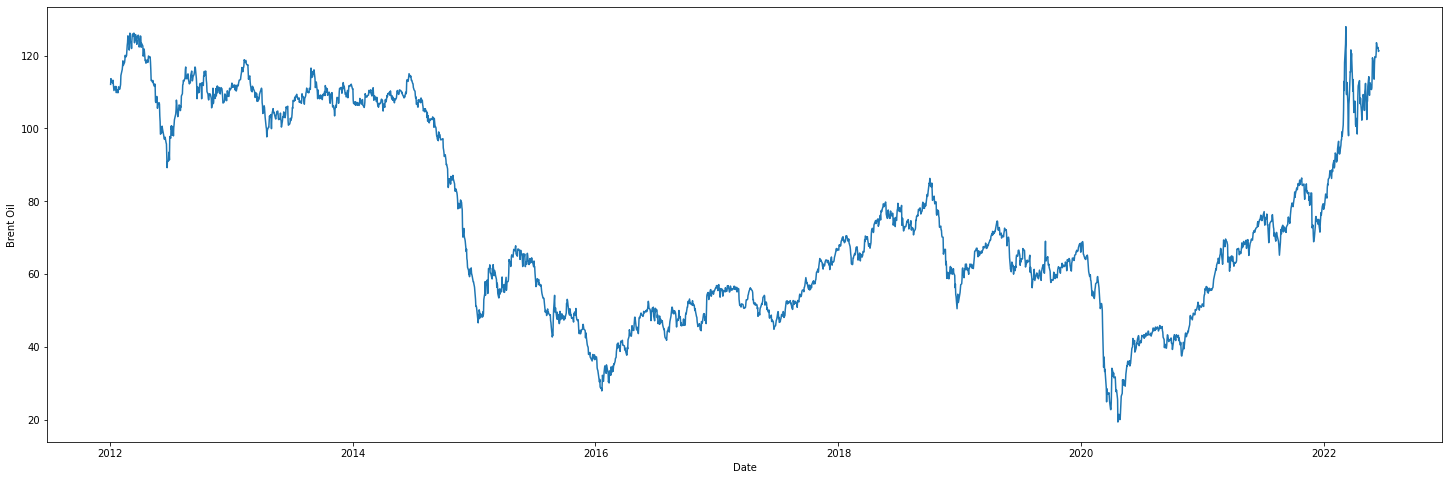

In [16]:
plt.rcParams["figure.figsize"] = (25,8)
sns.lineplot(data=df, x="Date", y="Brent Oil")

plt.show()

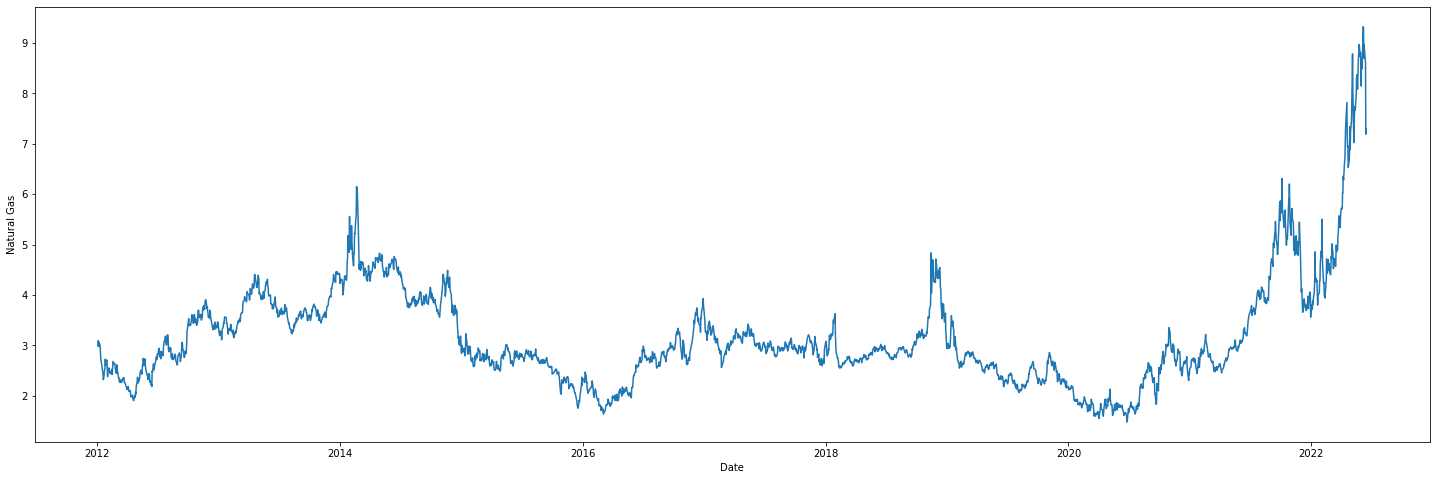

In [17]:
plt.rcParams["figure.figsize"] = (25,8)
sns.lineplot(data=df, x="Date", y="Natural Gas")

plt.show()

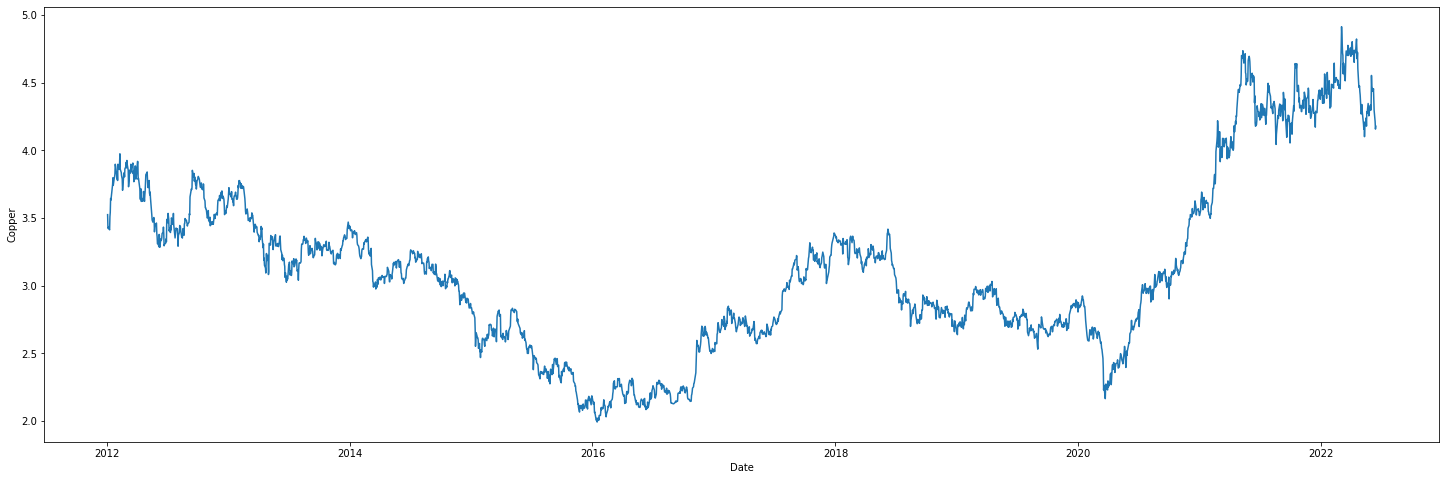

In [18]:
plt.rcParams["figure.figsize"] = (25,8)
sns.lineplot(data=df, x="Date", y="Copper")

plt.show()

In [19]:
df.corr()

,Crude Oil,Month,Day,Brent Oil,Natural Gas,Gold,Silver,Copper,Year
Crude Oil,1.000000,-0.061113,-0.003706,0.967352,0.629670,0.235434,0.575061,0.576720,-0.466205
Month,-0.061113,1.000000,0.005348,-0.066144,0.066446,-0.046895,-0.071106,-0.080210,-0.070633
Day,-0.003706,0.005348,1.000000,-0.005121,-0.000745,-0.008826,-0.005145,-0.004149,-0.006881
Brent Oil,0.967352,-0.066144,-0.005121,1.000000,0.561949,0.218652,0.599688,0.601358,-0.477770
Natural Gas,0.629670,0.066446,-0.000745,0.561949,1.000000,0.198904,0.198497,0.559681,0.060717
Gold,0.235434,-0.046895,-0.008826,0.218652,0.198904,1.000000,0.734949,0.713134,0.429312
Silver,0.575061,-0.071106,-0.005145,0.599688,0.198497,0.734949,1.000000,0.688431,-0.218002
Copper,0.576720,-0.080210,-0.004149,0.601358,0.559681,0.713134,0.688431,1.000000,0.243268
Year,-0.466205,-0.070633,-0.006881,-0.477770,0.060717,0.429312,-0.218002,0.243268,1.000000


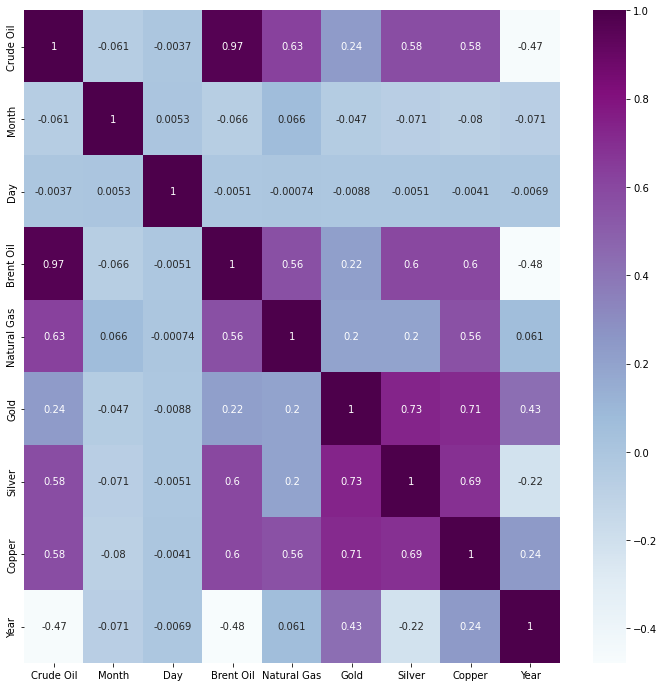

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(method='pearson'),cbar=True,cmap='BuPu',annot=True)

## Correlation Between the Commodities for the last 5 Years

In [21]:
df_last5=df[df["Year"]>= 2017]
df_last5.sort_values(by='Year')

df_last5

,Date,Crude Oil,Month,Day,Brent Oil,Natural Gas,Gold,Silver,Copper,Year
3009,2017-01-08,NaN,1.0,8.0,NaN,NaN,NaN,16.557,NaN,2017.0
3008,2017-01-22,NaN,1.0,22.0,NaN,NaN,NaN,17.182,NaN,2017.0
3007,2017-01-29,NaN,1.0,29.0,NaN,NaN,NaN,17.218,NaN,2017.0
3006,2017-02-05,NaN,2.0,5.0,NaN,NaN,NaN,17.487,NaN,2017.0
3005,2017-02-12,NaN,2.0,12.0,NaN,NaN,NaN,17.932,NaN,2017.0
...,...,...,...,...,...,...,...,...,...,...
4,2022-06-09,121.51,6.0,9.0,123.07,8.963,1852.8,21.817,4.3810,2022.0
3,2022-06-10,120.67,6.0,10.0,122.01,8.850,1875.5,21.931,4.2945,2022.0
2,2022-06-13,120.93,6.0,13.0,122.27,8.609,1831.8,21.255,4.2115,2022.0
1,2022-06-14,118.93,6.0,14.0,121.17,7.189,1813.5,20.954,4.1565,2022.0


In [22]:
df_last5[["Crude Oil","Brent Oil","Natural Gas","Gold","Silver","Copper"]].corr(method='pearson')

,Crude Oil,Brent Oil,Natural Gas,Gold,Silver,Copper
Crude Oil,1.000000,0.905195,0.889803,0.314454,0.345724,0.727303
Brent Oil,0.905195,1.000000,0.758360,0.123502,0.209657,0.670377
Natural Gas,0.889803,0.758360,1.000000,0.276335,0.320355,0.658360
Gold,0.314454,0.123502,0.276335,1.000000,0.870200,0.634300
Silver,0.345724,0.209657,0.320355,0.870200,1.000000,0.763956
Copper,0.727303,0.670377,0.658360,0.634300,0.763956,1.000000


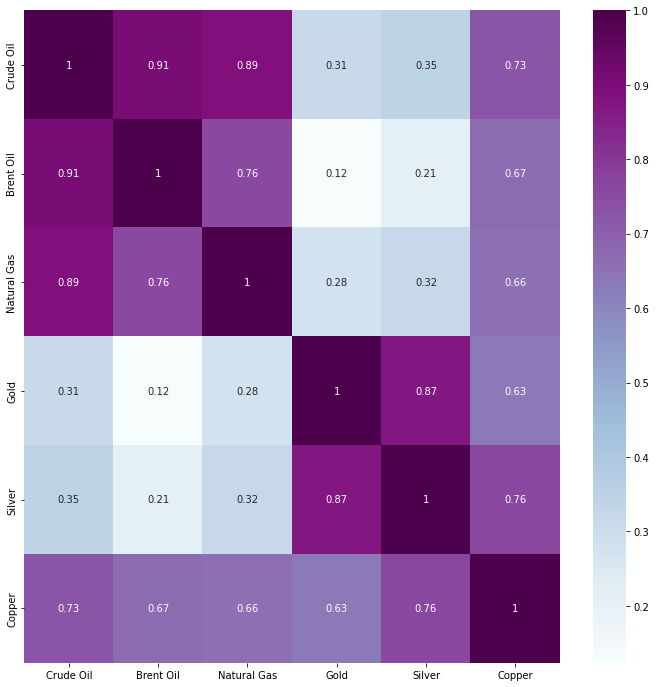

In [23]:
plt.figure(figsize=(12,12))
sns.heatmap(df_last5[["Crude Oil",
                      "Brent Oil",
                      "Natural Gas",
                      "Gold",
                      "Silver",
                      "Copper"]].corr(method='pearson'),
            cbar=True,cmap='BuPu',annot=True)

# **Gold Price Forecasting Using LSTM**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
import keras_tuner as kt

import tensorflow as tf

from IPython.display import SVG
import os

import datetime, time

from tensorflow import keras

import tensorflow as tf

import random

from keras import backend as K
from keras.models import model_from_json
from keras.models import load_model
from keras.regularizers import L1L2

In [32]:
df_Gold=df[['Date','Gold']]
df_Gold.head()

,Date,Gold
3258,2012-01-02,NaN
3257,2012-01-08,NaN
3256,2012-01-15,NaN
3255,2012-01-22,NaN
3254,2012-01-29,NaN


In [33]:
df_Gold=df_Gold.dropna()
df_Gold

,Date,Gold
2751,2014-05-25,1291.70
2750,2014-08-31,1287.70
2749,2016-03-25,1216.70
2748,2016-12-25,1135.00
2747,2017-04-14,1289.65
...,...,...
4,2022-06-09,1852.80
3,2022-06-10,1875.50
2,2022-06-13,1831.80
1,2022-06-14,1813.50


In [34]:
df_Gold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2742 entries, 2751 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2742 non-null   datetime64[ns]
 1   Gold    2742 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 64.3 KB


In [35]:
prediction_days = 500
df_train_g= df_Gold['Gold'][:len(df_Gold['Gold'])-prediction_days].values.reshape(-1,1)
df_test_g= df_Gold['Gold'][len(df_Gold['Gold'])-prediction_days:].values.reshape(-1,1)

scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(df_train_g)

scaler_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler_test.fit_transform(df_test_g)

In [36]:
def create_dataset(dataset, look_back=30):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

trainX, trainY = create_dataset(scaled_train)
testX, testY = create_dataset(scaled_test)

In [37]:
print(trainX.shape)
print(testX.shape)

(2212, 30)
(470, 30)


In [38]:
print(testX[150])
print(trainX[0])

[0.32999722 0.25660272 0.26160689 0.26800111 0.35168196 0.34473172
 0.32388101 0.26800111 0.14178482 0.12427023 0.15401724 0.10480956
 0.06338616 0.05949402 0.         0.10675563 0.11787601 0.11787601
 0.10647762 0.13344454 0.13789269 0.12621629 0.14261885 0.16819572
 0.15929942 0.1234362  0.14484292 0.12232416 0.14206283 0.08701696]
[0.2840709  0.27937551 0.1960324  0.10012912 0.28166451 0.26787182
 0.81101068 1.         0.89259303 0.64561568 0.65993661 0.66874046
 0.66486677 0.65477169 0.68235708 0.69198263 0.70149079 0.68165278
 0.71076417 0.71581171 0.70947294 0.72074187 0.73752788 0.72132879
 0.76311774 0.79422467 0.80068083 0.79974175 0.80772391 0.81864069]


In [39]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [40]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
    
def model_builder(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32), 
                   return_sequences=True, 
                   input_shape= ( trainX.shape[1], trainX.shape[2]), 
                   bias_regularizer = L1L2(0.009, 0.004)))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32),return_sequences=True))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.05)))
    model.add(Dense(1, activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
   
    model.compile(loss=root_mean_squared_error, optimizer='adam',metrics = ['mse'])
    
    return model

tuner = kt.RandomSearch(model_builder, objective='val_loss', max_trials = 10, executions_per_trial =1,directory = "./gold2/")

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', # Monitor the validation loss
                                                     min_delta=0,    # until it doesn't change (or gets worse)
                                                     patience=5,  # patience > 1 so it continutes if it is not consistently improving
                                                     verbose=0, 
                                                     mode='auto')]

tuner.search(x=trainX, y=trainY, epochs = 200, batch_size =512, validation_data=(testX, testY), callbacks=[callbacks],shuffle = True)

Trial 10 Complete [00h 02m 27s]
val_loss: 0.4365071654319763

Best val_loss So Far: 0.23144516348838806
Total elapsed time: 00h 30m 11s
INFO:tensorflow:Oracle triggered exit


In [41]:
tuner.results_summary()

Results summary
Results in ./gold2/untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
input_unit: 32
n_layers: 3
lstm_0_units: 160
Dropout_rate: 0.4
dense_activation: sigmoid
lstm_1_units: 128
lstm_2_units: 64
lstm_3_units: 320
Score: 0.23144516348838806
Trial summary
Hyperparameters:
input_unit: 192
n_layers: 2
lstm_0_units: 192
Dropout_rate: 0.30000000000000004
dense_activation: sigmoid
lstm_1_units: 288
lstm_2_units: 128
lstm_3_units: 320
Score: 0.4011230170726776
Trial summary
Hyperparameters:
input_unit: 192
n_layers: 3
lstm_0_units: 256
Dropout_rate: 0.2
dense_activation: relu
lstm_1_units: 64
lstm_2_units: 288
lstm_3_units: 416
Score: 0.40251511335372925
Trial summary
Hyperparameters:
input_unit: 224
n_layers: 4
lstm_0_units: 192
Dropout_rate: 0.05
dense_activation: sigmoid
lstm_1_units: 32
lstm_2_units: 32
lstm_3_units: 32
Score: 0.43575018644332886
Trial summary
Hyperparameters:
input_unit: 224
n_layers: 2
lstm_0_units: 448
Dropout_rate: 0.45
dense_activati

In [42]:
best_model = tuner.get_best_models(num_models=1)[0]

In [43]:
history = best_model.fit(x=trainX, y=trainY, epochs = 150, batch_size =128, validation_data=(testX, testY), shuffle=False, verbose=0)

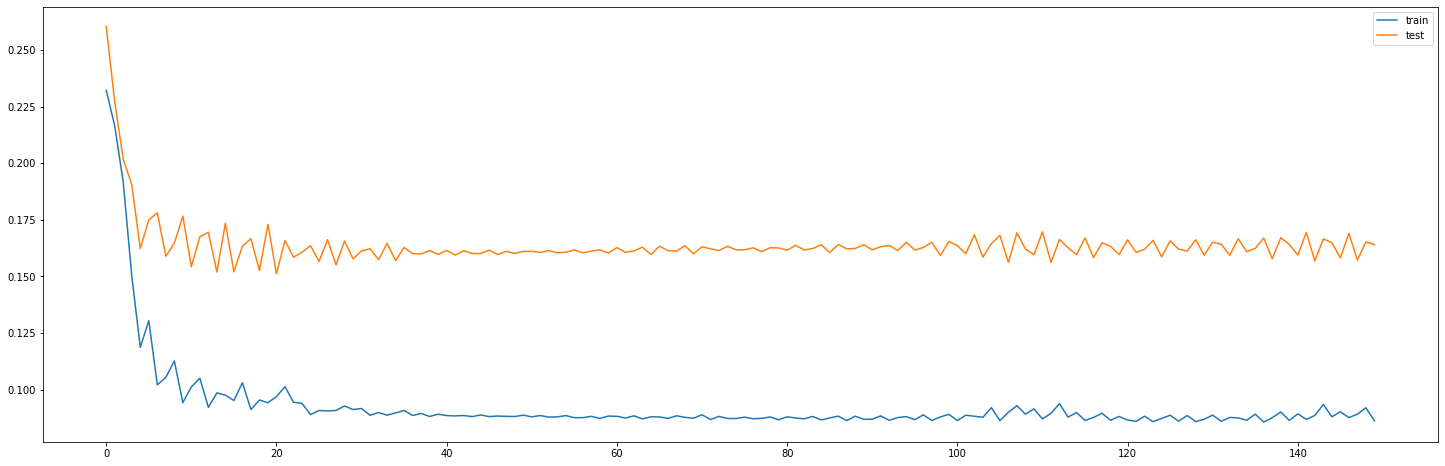

In [44]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [45]:
predicted_gold_price = best_model.predict(testX)

In [46]:
predicted_gold_price = scaler_test.inverse_transform(predicted_gold_price.reshape(-1, 1))

In [47]:
true = scaler_test.inverse_transform(testY.reshape(-1, 1))

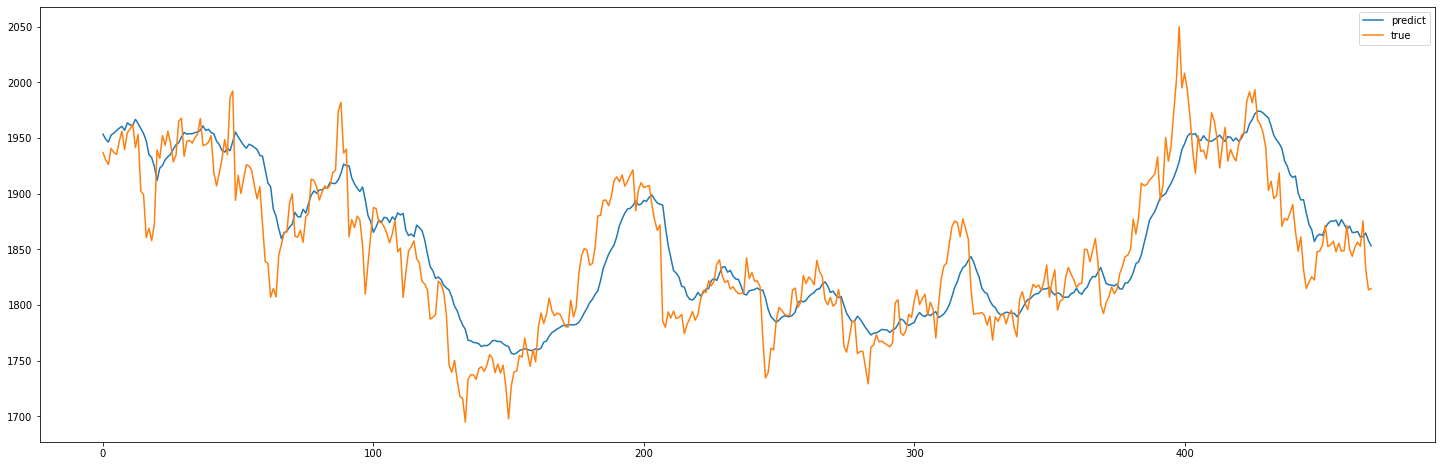

In [48]:
plt.plot(predicted_gold_price, label='predict')
plt.plot(true, label='true')
plt.legend()
plt.show()

In [49]:
# evaluate the model
scores = best_model.evaluate(trainX, trainY, verbose=0)
print("%s: %.2f%%" % (best_model.metrics_names[1], scores[1]*100))

mse: 0.28%


In [50]:
best_model.save("models/goldPriceModel.h5")
print("Saved model to disk")

Saved model to disk


In [51]:
# load json and create model
# load model
model_g = load_model("models/goldPriceModel.h5", custom_objects={'root_mean_squared_error':                   
root_mean_squared_error})
print("dd")
# summarize model.
model_g.summary()
score = model_g.evaluate(trainX, trainY, verbose=0)
print("%s: %.2f%%" % (model_g.metrics_names[1], score[1]*100))

dd
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 32)             8064      
                                                                 
 lstm_1 (LSTM)               (None, 1, 160)            123520    
                                                                 
 lstm_2 (LSTM)               (None, 1, 128)            147968    
                                                                 
 lstm_3 (LSTM)               (None, 1, 64)             49408     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 dense (Dense)               (None, 1, 1)              65        
                                                                 
Total params: 329,025
Trainable params: 329,025
Non-t